# Homework 6: Exploring Uber and Lyft Prices in Boston

Name: Luke Stockbridge & Sylvia Kozub

Student ID: 510195, 508686

Collaborators: 


**TODO**
Fix all graph titles that I definitely messed up and are inaccurate
Comment code where necessary so its readable and understandable
Look at surge price column directly
Conclusion: Although the weather (rain and temp) didn't have great impact on price we only at two months where weather is significantly less variable thann it would be year round.  If we had a whole hyear of data we think that we would haveg more useful conclusion.  (rainy months, hot months, cold months)
**LUKE IS SMARTER THAN NEWTON**

**STATUS UPDATE**

1. Done until final review

2. Decent, could use more ideas, might be alright until final review

3. I think this is good until final review unless we want more variety of plots of one "wow" factor graph

4. Done until final review

5. Done until final review unless we add more (things we could add- 1. if not weather what causes surges? Time of day? Day of year (look at thanksgiving and christmas?) or 2. Break down weather surge pricing between Uber and Lyft

6. Lightly started, needs more details and links to figures.

7. Unstarted

**Things bubu did but dudu needs to look over or change**
1.  did more for problem 5, looked at surge pricing by hour, surge pricing by day of the year , ANYWHERE I put a WARNING means you should read through bc im not the smartest
2. i wrote out a lot for 7 and answered everything 


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester, focussing on M0, M1, M2, and M6. 
> **Note:** You may do some supervised learning (as covered in M3 and M4), however, this should not be the _only_ thing(s) you do. We definitley want to see DS workflow/life-cycle (**M1**), lots of EDA (**M2**) and a discussion of ethical issues (**M6**):

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Linear Regression (if applicable - depends on problem/dataset)
* [M4] Linear Classification (if applicable - depends on problem/dataset)
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M6] Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class; you might want to also experiemnt with or use other packages. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend). 

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go. Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [1]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the source/link given above and be sure to save the data in a folder called `data` under the `utility` directory. Your final path should look like `utility/data/rideshare_kaggle.csv` -- if it doesn't **we will not be able to properly grade your assignment!**

<!-- BEGIN QUESTION -->

### Problem 1

Let's start by taking a look at our data.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

In [3]:
import pandas as pd

data = pd.read_csv('utility/data/rideshare_kaggle.csv')

print(data.shape)
print(data['id'].dtype)
print(data['timestamp'].dtype)
print(data['hour'].dtype)
print(data['day'].dtype)
print(data['month'].dtype)
print(data['price'].dtype)
print(data['precipIntensity'].dtype)
print(data['temperature'].dtype)
print(data['surge_multiplier'].dtype)
print(data['distance'].dtype)

(693071, 57)
object
float64
int64
int64
int64
float64
float64
float64
float64
float64


The data was collected from Uber and Lyft services operating in Boston, Massachisetts. It may have been obtained through data scraping or provided by the companies themselves. 

The dataset has 693,071 examples and 57 features. 

FEATURES: The features in the dataset include a mix of numerical, categorical, and date-time data. Numerical data is split between float64 and int64 types.  Out of the 57 columns, 26 can take on decimal values, 17 take on integer values, 10 contain strings, and there are 4 "other" columns.   

Some more detailed breakdowns of certain features (specifically the first several listed in the dataset plus any features we end up taking a closer look at later on) in form: name | type | short description | range of values feature can take

**id** | object | a unique identifier for each ride | can take on any string of 32 letters and numbers broken up by dashes in form 8-4-4-4-12

**timestamp** | float64 (unix) | time of ride | in general can take on any float64 value, in this specific dataset values fall between approximately 1.5432 and 1.5452 billion.

**hour** | int64 | hour of the day | can take an integer value between 0 and 23

**day** | int64 | data claims this is day of the week | values range between 0 and 30 which leads me to believe this is actually day of the month

**month** | int64 | month in which the ride took place | in general values could range between 1-12 but in this data set only 11 and 12 are present (presumably November and December)

**price** | float64 (unix) | cost of each ride | prices typically fall within the range of 2.50 (minimum) to 97.50 (maximum)

**precipIntensity** | float64 | the intensity of precipitation (rain,snow,etc.) at the time of each ride | is a floating point number with varying values, such as 0.0 indicating no precipitation, to higher values representing varying degrees of intensity (.14 is max in this dataset)

**temperature** | float64 | the weather temperature at the time of each ride | stores as a flaoting-point number, ranging from approximately 15 degrees F to 60 degrees F in this dataset

**surge_multiplier** | float64 | the surge pricing multiplier applied to the base price of each ride | floating-point number that ranges from 1.0(no surge) to 3.0(significant surge) or higher during peak demand

**distance** | float64 | the length of each ride in miles | ride distances range from approximately 0.02 miles(short rides) to 7.86 miles(longer rides)



### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You should add comments and markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

**Cleaning Process**

First we began by checking if any data was missing from any of the data points.  As the dataset description claimed, there were relatively few missing values.  But we found about 50000 instances of price data listed as NA. To avoid this affecting our results (we plan on examining price data) we dropped all of the null/missing/NA values. We confirmed that this process worked by checking to make sure the NA values were removed.  We also decided to convert the unix timestamp to datetime.  This has many benefits such as readability, ease of manipulation, filtering and plotting.  After coming up with an idea we wanted to explore we took one more cleaning step by filtering some of out data into categories we will look at later: rain intensity (divided between rain intensity greater than 0 to indicate it is raining and 0 indicating that it is not raining) and temperature (divided between temperatures below and above freezing).

In [3]:
import pandas as pd

data = pd.read_csv('utility/data/rideshare_kaggle.csv')

#cleaning:

#Find any missing values
missing_values = data.isnull().sum()
print(missing_values)

#Remove entries with missing price values
data = data.dropna(subset=['price'])

#Check if successful
missing_values = data.isnull().sum()
print(missing_values)

#Filter rides by rain intensity
rain_threshold = 0.0
rain_rides = data[data['precipIntensity'] > rain_threshold]
dry_rides = data[data['precipIntensity'] <= rain_threshold]

#Filter rides by temperature 
temp_threshold = 32
freezing_rides = data[data['temperature'] <= temp_threshold]
thaw_rides = data[data['temperature'] > temp_threshold]

#Convert timestamps from float64 to type datetime as they should be
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
print(data['timestamp'].dtype)

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

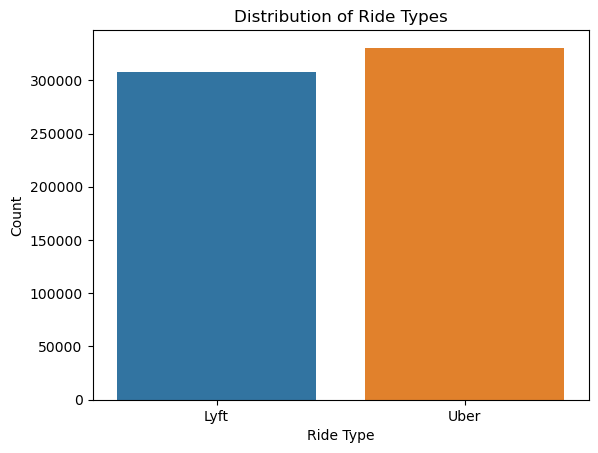

In [5]:
#amount of lyft vs. uber rides

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='cab_type')
plt.title('Distribution of Ride Types')
plt.xlabel('Ride Type')
plt.ylabel('Count')
plt.show()


In [6]:
# summary statistics for Lyft vs Uber
summary_stats = data['cab_type'].value_counts()

print(summary_stats)

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64


**To start, we explore the distribution of ride types, and see that taking Uber rides is slightly more popular than taking Lyft rides. But more importantly, we can note that the data is approximately split between Lyft and Uber which could open the door into exploring differences between the two companies.**

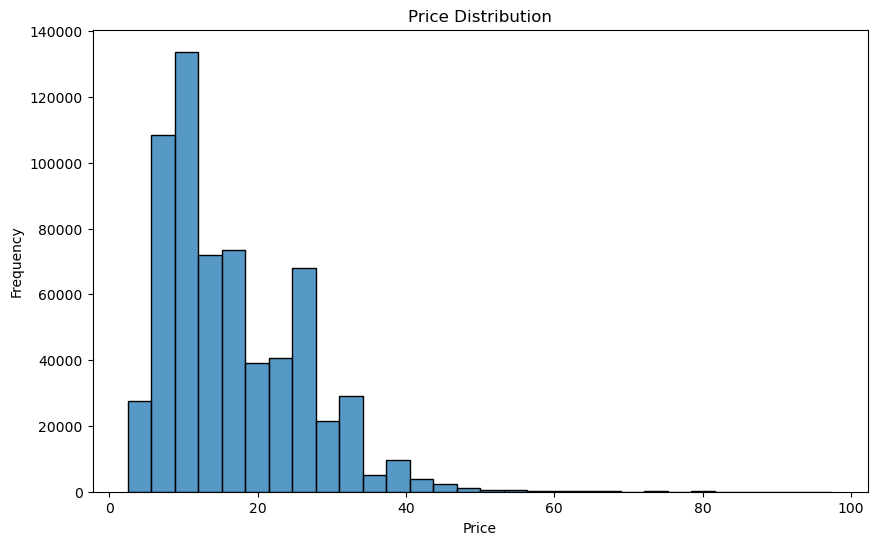

In [7]:
#the price distribution

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='price', bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [8]:
price_summary_stats = data['price'].describe()
print(price_summary_stats)

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64


**The statistics and graph shows us the average ride price is approximately $16.55. We noticed that the data is skewed right, and one of the things we might look into is what causes the unusually high prices. For starters, how does the price get affected with the duration of the ride for both Uber and Lyft?**

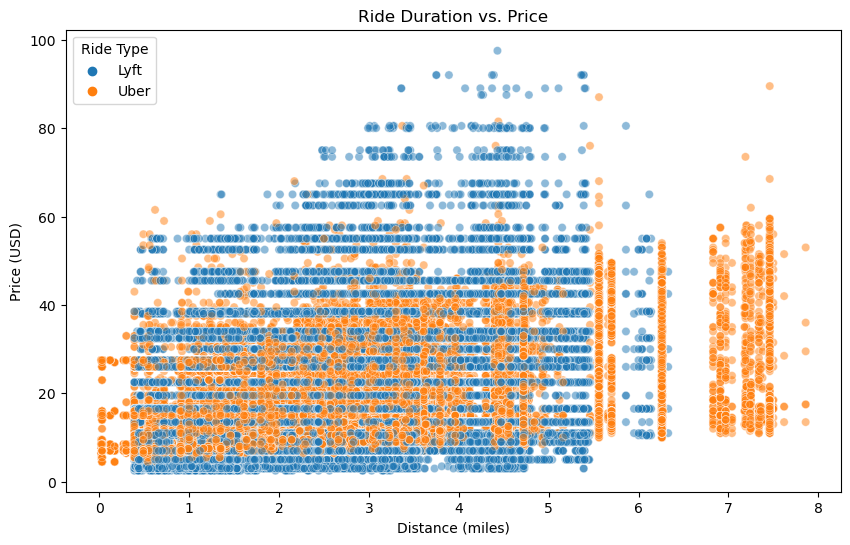

In [9]:
#ride duration vs price

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='distance', y='price', hue='cab_type', alpha=0.5)
plt.title('Ride Duration vs. Price')
plt.xlabel('Distance (miles)')
plt.ylabel('Price (USD)')
plt.legend(title='Ride Type')
plt.show()

**It seems that Lyft tends to have higher prices, and Uber is seen having more longer drives that Lyft. In general, as the distance per ride increases, the price increases. From here we could also look at how the time of the day is associated with ride counts.**

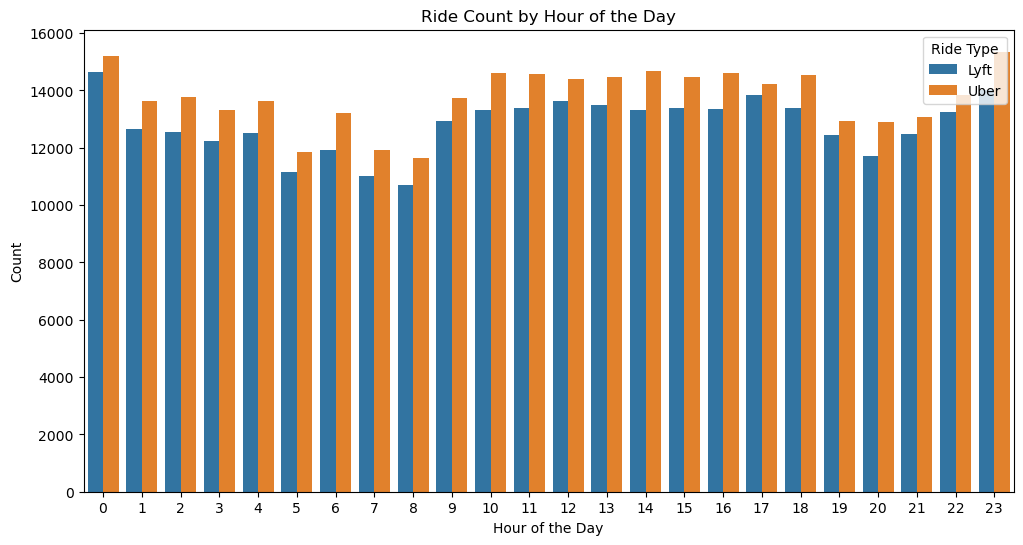

In [10]:
#number of ride by the hour of the day

data['hour_of_day'] = pd.to_datetime(data['timestamp'], unit='s').dt.hour


plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='hour_of_day', hue='cab_type')
plt.title('Ride Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Ride Type')
plt.xticks(rotation=0)
plt.show()

**It is interesting to note in the graph above that the quantity of rides across different times varies. Perhaps some of the unusually high prices are caused by prices being increased during peak demand hours. Continuing to explore, we saw that several columns in the data had to do with temperature and weather so we looked further: how many of the rides actually happen in the rain? Let's explore how many rides occur across varying precipitation intensities.**

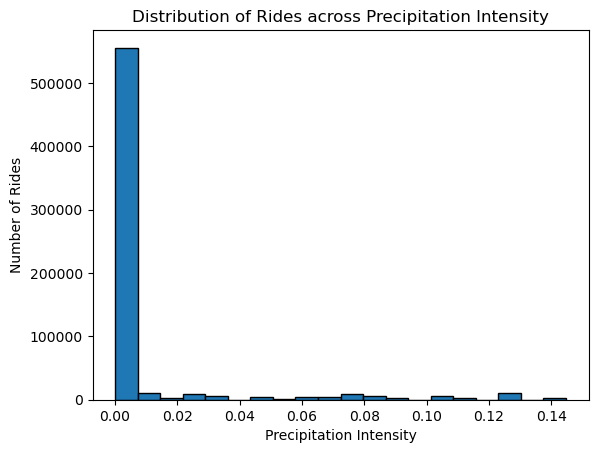

In [11]:
#histogram of ride count and precipitation intensity
plt.hist(data['precipIntensity'], bins=20, edgecolor='k')
plt.title('Distribution of Rides across Precipitation Intensity')
plt.xlabel('Precipitation Intensity')
plt.ylabel('Number of Rides')
plt.show()

In [12]:
# summary statistics for precipitation intensity
precip_intensity_stats = data['precipIntensity'].describe()

print("Summary Statistics for Precipitation Intensity:")
print(precip_intensity_stats)

Summary Statistics for Precipitation Intensity:
count    637976.000000
mean          0.008909
std           0.026880
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.144700
Name: precipIntensity, dtype: float64


**The precipitation is skewed right just as the prices were. Perhaps this is a sign that prices are higher during high precipitation intensities.  This might be something that could be further explored. Sticking with weather let's see what temperature it is during these rides**

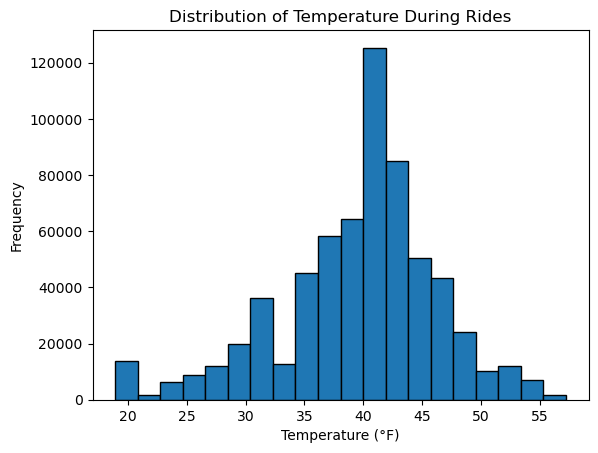

In [13]:
#histogram for temperature during the rides
plt.hist(data['temperature'], bins=20, edgecolor='black')
plt.title('Distribution of Temperature During Rides')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show() 

In [14]:
# summary statistics for temperature
precip_intensity_stats = data['temperature'].describe()

print("Summary Statistics for Temperature:")
print(precip_intensity_stats)

Summary Statistics for Temperature:
count    637976.000000
mean         39.582406
std           6.725500
min          18.910000
25%          36.450000
50%          40.490000
75%          43.580000
max          57.220000
Name: temperature, dtype: float64


**Although this data is more normal, it is slightly skewed left. Perhaps lower temperatures (especially below freezing) lead to higher prices for rides. Let's explore temperature and ride price directly.**

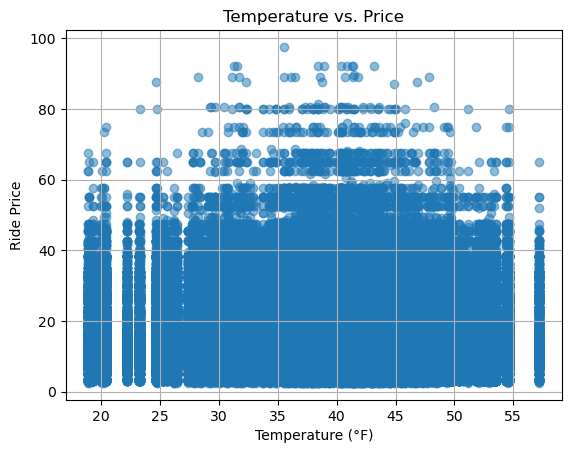

In [15]:
# temperature vs. price
plt.scatter(data['temperature'], data['price'], alpha=0.5)
plt.title('Temperature vs. Price')
plt.xlabel('Temperature (°F)')
plt.ylabel('Ride Price')
plt.grid(True)

plt.show()

**Looking further into the data we noticed the surge multiplier, which is the measure of how much the ride's price was increased due to surge pricing. From this, we wanted to see how many of the rides has surge multipliers in a particuliar range.**

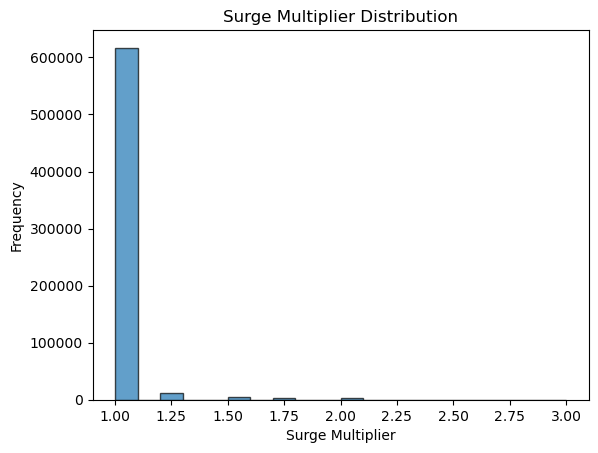

In [16]:
# surge multiplier distribution
plt.hist(data['surge_multiplier'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Surge Multiplier Distribution')
plt.xlabel('Surge Multiplier')
plt.ylabel('Frequency')


plt.show()

In [17]:
# summary statistics for temperature
precip_intensity_stats = data['surge_multiplier'].describe()

print("Summary Statistics for surge_multiplier:")
print(precip_intensity_stats)

Summary Statistics for surge_multiplier:
count    637976.000000
mean          1.015068
std           0.095422
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: surge_multiplier, dtype: float64


**From this information we get the average surge multiplier(approximately 1.013), and helps show that surge pricing is relatively rare. But when there is surge pricing what causes it? This might be something interesting and important to look into because it may show how this could be crucial for ride-sharing companies to optimize their pricing strategies and for riders to understand when to expect higher prices.**

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

**Answer here:** (feel free to make multiple cells!)

Question: Does poor weather cause the price of uber and lyft rides to increase?  

Hypothesis: When the weather is poor, the demand for uber/lyft rides increases causing prices to also increase.

Inspiration: Above a couple of graphs we produced while exploring the data sparked my interest.  First we noticed that the overall price distribution was skewed right. We wondered what was the cause of these less common, more expensive rides.  From experience and the following scatterplot we produced of ride distance versus price we already knew that distance was positively correlated with price.  We began to wonder what factors other than distance (if any) had an impact on price.  We chose to explore weather because I personally found this question to be of interest.  I tend to heavily favor walking and saving money over taking an uber/lyft.  While I may not intend on using an uber/lyft as part of plans I make I always consider it a good backup option if the weather becomes poor.  I wondered if other people feel the same way, if a shock to demand for ubers/lyfts during bad weather would result in price increases causes by some backend supply/demand algorithm in uber/lyft software.

Use: We believe that answering this hypothesis could lead to useful information that could help others in making decisions.  For example let's say you're deciding whether or not to go downtown with friends for the day.  There is a chance of rain which could ruin your plans of walking but your friend points out that if the weather was poor you could always take ubers/lyfts from place to place instead of walk.  They point out that the ubers/lyfts they have taken recently weren't that expensive.  If our hypothesis were to be true and we find that prices noticably increase when weather is poor due to an increase in demand, then this might have an impact on the decision you make to go downtown or not.

----------------------------------------------------------------------


Factors to consider: 

Weather Metrics: What is poor weather considered to be? Poor weather could be rain, snow, extreme temperatures, storms. 

Time of the day: Does the impact of poor weather on ride prices vary depending on the time of the day? So rush hour during bad weather might result in higher prices. 

How can you use the data to support or reject your hypothesis?

Data Filtering: We could use weather-related columns such as "precipIntensity," "temperature," "weatherMain". 

Grouping the Data: We could then group the data by poor weather conditions and compare the average ride prices during these specific weather conditions. 





### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

**We will begin by taking a quick look at the average price when it is raining (precipitation intensity > 0) and when it is not raining (preciptation intensity = 0).  We believe that rain is more likely to impact travel patterns than temperature.**

In [18]:
#Average price when it is raining
prec_threshold = 0.0

high_prec = data[data['precipIntensity'] > prec_threshold]

average_price_high_prec = high_prec['price'].mean()

print(average_price_high_prec)

16.528193559546803


In [19]:
#Average price when it is not raining


low_prec = data[data['precipIntensity'] == prec_threshold]

average_price_low_prec = low_prec['price'].mean()

print(average_price_low_prec)

16.549831299526467


**Well this does not initially seem to back our hypothesis, but let's look deeper into the data.  Below we will create a side by side boxplot for rainy and non-rainy conditions as well as a scatter plot for price versus precipitation probability**

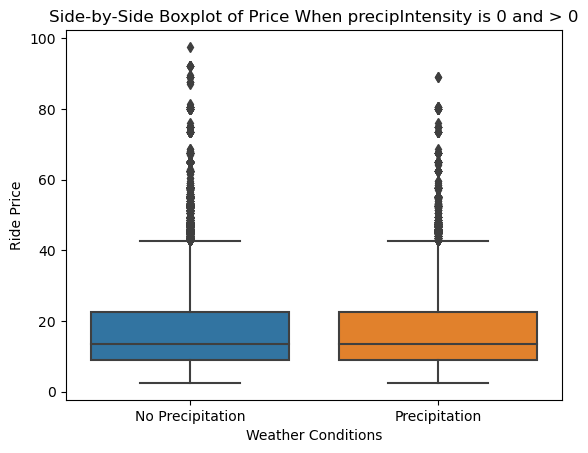

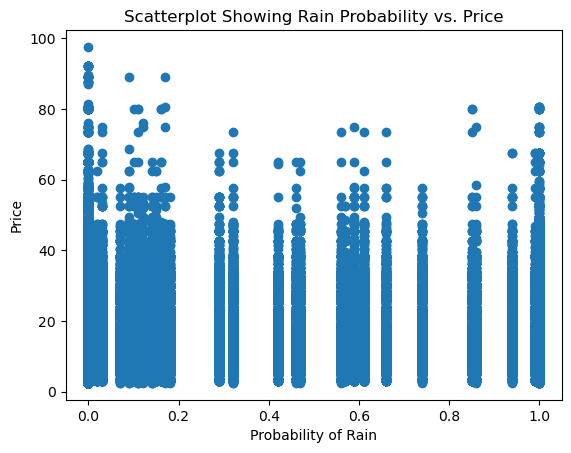

In [20]:
import matplotlib.pyplot as plt

#Create a variable based on precipIntensity
data['precip_category'] = data['precipIntensity'].apply(lambda x: 'No Precipitation' if x == 0 else 'Precipitation')

#Boxplot
sns.boxplot(data=data, x='precip_category', y='price')

#Labels and titles
plt.title('Side-by-Side Boxplot of Price When precipIntensity is 0 and > 0')
plt.xlabel('Weather Conditions')
plt.ylabel('Ride Price')

plt.show()

#Scatter Plot
plt.scatter(data['precipProbability'], data['price'])

#Labels and titles
plt.title('Scatterplot Showing Rain Probability vs. Price')
plt.xlabel('Probability of Rain')
plt.ylabel('Price')

plt.show()

**These graphs are a little difficult to interpret.  It appears as though there are more noticiably higher prices for no precipitation and lower probabilities of rain, but it is important to consider that there is likely significantly more data points for non-rainy conditions and therefore the likelihood of finding high outliers in non-rainy conditions is greater.  Below we will calculate summary statistics with the hope of finding more interpretable information.** 

In [21]:
#Calculate summary statistics

rain_stats = data[data['precip_category'] == 'Precipitation']['price'].describe()
no_rain_stats = data[data['precip_category'] == 'No Precipitation']['price'].describe()
print("Summary Statistics for Rides with Precipitation:")
print(rain_stats)
print("\nSummary Statistics for Rides with No Precipitation:")
print(no_rain_stats)

Summary Statistics for Rides with Precipitation:
count    138748.000000
mean         16.528194
std           9.304146
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          89.000000
Name: price, dtype: float64

Summary Statistics for Rides with No Precipitation:
count    499228.000000
mean         16.549831
std           9.329972
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64


**Once again this data does not back our hypothesis.  The mean price for rides with no precipitation is greater than the mean price for rides with precipitation. The 25th, 50th, and 75th percentiles all match.  One thought we should consider is that perhaps when it is raining people take shorter rides more often and therefore any increase in prices from increased demand because of rain could be counteracted by the fact that the average ride distance is shorter which would make the price cheaper. Below we will explore this idea** 

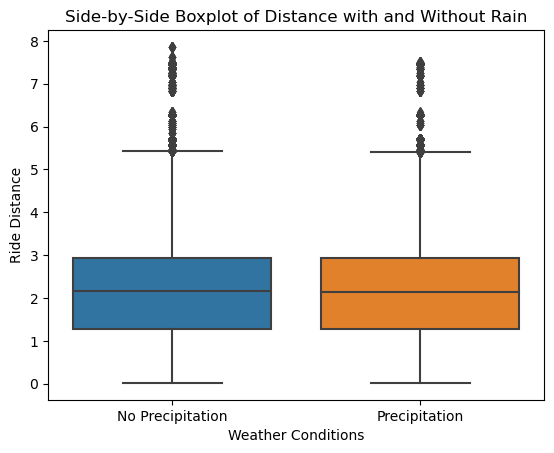

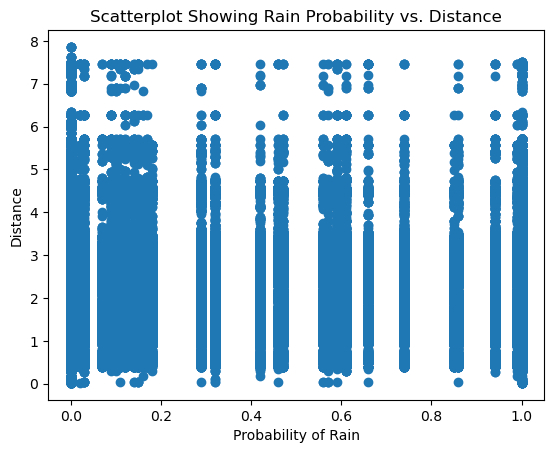

In [22]:
#This doesn't seem to support our hypothesis
#Thought: Maybe in rainy conditions people take shorter rides more often and that causes price to be less
#This could cancel out any surge price resulting from poor weather and increased demand

#Boxplot
sns.boxplot(data=data, x='precip_category', y='distance')

#Labels and titles
plt.title('Side-by-Side Boxplot of Distance with and Without Rain')
plt.xlabel('Weather Conditions')
plt.ylabel('Ride Distance')

plt.show()

#Scatter Plot
plt.scatter(data['precipProbability'], data['distance'])

#Labels and titles
plt.title('Scatterplot Showing Rain Probability vs. Distance')
plt.xlabel('Probability of Rain')
plt.ylabel('Distance')

plt.show()

In [23]:
rain_stats = data[data['precip_category'] == 'Precipitation']['distance'].describe()
no_rain_stats = data[data['precip_category'] == 'No Precipitation']['distance'].describe()
print("Summary Statistics for Rides with Precipitation:")
print(rain_stats)
print("\nSummary Statistics for Rides with No Precipitation:")
print(no_rain_stats)

Summary Statistics for Rides with Precipitation:
count    138748.000000
mean          2.189701
std           1.139422
min           0.020000
25%           1.280000
50%           2.150000
75%           2.930000
max           7.500000
Name: distance, dtype: float64

Summary Statistics for Rides with No Precipitation:
count    499228.000000
mean          2.189139
std           1.134298
min           0.020000
25%           1.270000
50%           2.160000
75%           2.930000
max           7.860000
Name: distance, dtype: float64


**Our theory that rain results in shorter rides and thus does not result in increased prices does not seem accurate. The mean ride distance is nearly identical.  Overall it seems safe to conclude that at least from this dataset, rain doesn't cause an increase in demand that causes an increase in prices. We realized that it is important to consider that all of this data came from November and December where rain is much more uncommon than it is in other months. Afterall, cold winter temperatures could potentially have more of an impact on changing travel patters than rain.  We will now explore if the temperature element of weather causes increased Uber/Lyft prices.**

In [24]:
#Create a variable based on temperature, we will divide bewteen above and below freezing
data['temperature_category'] = data['temperature'].apply(lambda x: '≤ 32°F' if x <= 32 else '> 32°F')

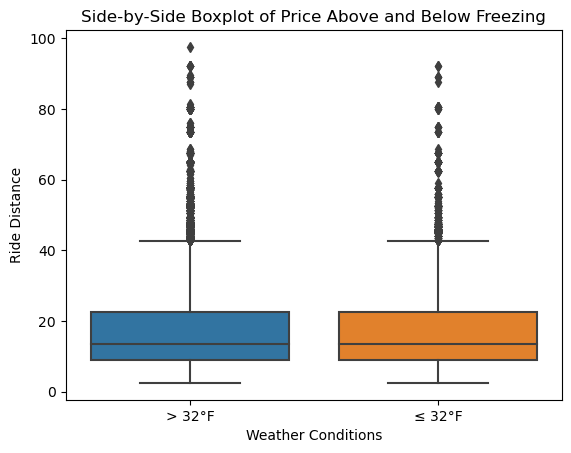

In [25]:
#Boxplot
sns.boxplot(data=data, x='temperature_category', y='price')

#Labels and titles
plt.title('Side-by-Side Boxplot of Price Above and Below Freezing')
plt.xlabel('Weather Conditions')
plt.ylabel('Ride Distance')

#Scatterplot


plt.show()

In [26]:
# Compute summary statistics
low_temp_stats = data[data['temperature_category'] == '≤ 32°F']['price'].describe()
high_temp_stats = data[data['temperature_category'] == '> 32°F']['price'].describe()

# Display the summary statistics
print("Summary Statistics for Rides with Temperature ≤ 32°F:")
print(low_temp_stats)
print("\nSummary Statistics for Rides with Temperature > 32°F:")
print(high_temp_stats)

Summary Statistics for Rides with Temperature ≤ 32°F:
count    93103.000000
mean        16.547854
std          9.306260
min          2.500000
25%          9.000000
50%         13.500000
75%         22.500000
max         92.000000
Name: price, dtype: float64

Summary Statistics for Rides with Temperature > 32°F:
count    544873.000000
mean         16.544659
std           9.327456
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64


**This appears to be a dead-end again. The mean prices and quartiles are nearly identical.  To be thorough we will once again check to see if perhaps colder temperatures encourage people to take shorter rides more often which could nullify any increase in prices caused by cold temperatures.**

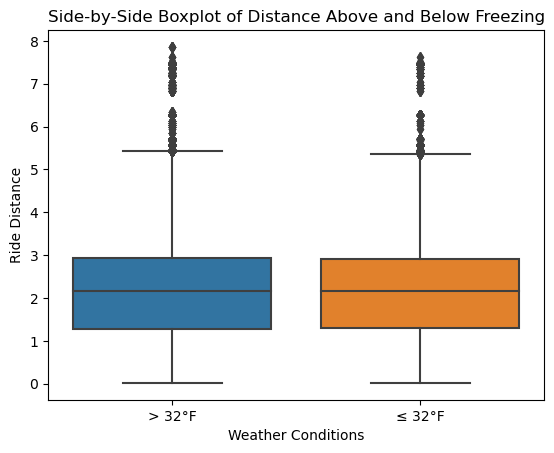

In [27]:
#Check rain versus distance
#possibly in rain people take shorter rides more often and that causes price to be less
sns.boxplot(data=data, x='temperature_category', y='distance')

# Add labels and title
plt.title('Side-by-Side Boxplot of Distance Above and Below Freezing')
plt.xlabel('Weather Conditions')
plt.ylabel('Ride Distance')

# Show the plot
plt.show()

In [28]:
# Compute summary statistics
low_temp_stats = data[data['temperature_category'] == '≤ 32°F']['distance'].describe()
high_temp_stats = data[data['temperature_category'] == '> 32°F']['distance'].describe()

# Display the summary statistics
print("Summary Statistics for Rides with Temperature ≤ 32°F:")
print(low_temp_stats)
print("\nSummary Statistics for Rides with Temperature > 32°F:")
print(high_temp_stats)

Summary Statistics for Rides with Temperature ≤ 32°F:
count    93103.000000
mean         2.192445
std          1.134766
min          0.020000
25%          1.290000
50%          2.170000
75%          2.920000
max          7.620000
Name: distance, dtype: float64

Summary Statistics for Rides with Temperature > 32°F:
count    544873.000000
mean          2.188717
std           1.135524
min           0.020000
25%           1.270000
50%           2.160000
75%           2.930000
max           7.860000
Name: distance, dtype: float64


**This does not appear to support our hypothesis.  Ride distance was not shorter in temperatures below freezing than above.  However, what if we looked at temperatures in a little more extreme of a way.  Instead of dividing at 32 degrees we will now examine the tails of the data, specifically comparing below 20 and above 55 degrees.**

In [29]:
#Create a variable based on temperature
data['temperature_category'] = data['temperature'].apply(lambda x: '≤ 20°F' if x <= 20 else ('> 55°F' if x > 55 else 'Other'))

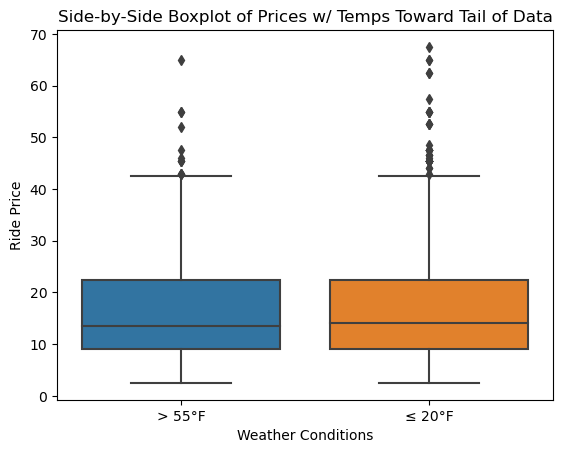

In [30]:
#Get tail data
tail_data = data[data['temperature_category'].isin(['≤ 20°F', '> 55°F'])]

#Boxplot
sns.boxplot(data=tail_data, x='temperature_category', y='price')

# Add labels and title
plt.title('Side-by-Side Boxplot of Prices w/ Temps Toward Tail of Data')
plt.xlabel('Weather Conditions')
plt.ylabel('Ride Price')

# Show the plot
plt.show()

In [31]:
# Compute summary statistics
low_temp_stats = data[data['temperature_category'] == '≤ 20°F']['price'].describe()
high_temp_stats = data[data['temperature_category'] == '> 55°F']['price'].describe()

# Display the summary statistics
print("Summary Statistics for Rides with Temperature ≤ 20°F:")
print(low_temp_stats)
print("\nSummary Statistics for Rides with Temperature > 55°F:")
print(high_temp_stats)

Summary Statistics for Rides with Temperature ≤ 20°F:
count    5041.000000
mean       16.571315
std         9.305599
min         2.500000
25%         9.000000
50%        14.000000
75%        22.500000
max        67.500000
Name: price, dtype: float64

Summary Statistics for Rides with Temperature > 55°F:
count    1735.000000
mean       16.524496
std         9.150391
min         2.500000
25%         9.000000
50%        13.500000
75%        22.500000
max        65.000000
Name: price, dtype: float64


**Although the discrepancy is not super extreme, it is important to note that rides under 20 degrees cost 5 cents more on average than rides above 55 degrees.  It is possible that this increased average price is the result of increased demand on extremely cold days.  The boxplot also shows more high outliers for less than 20 degrees than greater than 55 degrees. Uber/Lyft may apply surge pricing when demand is great.  Now we'll continue looking at the data by specifically investigating the surge pricing column, and whether surge pricing occurs more often during specific conditions, and how this ends up affecting ride prices.**

In [32]:
# compute average ride prices with & without surge pricing 
average_price_with_surge = data[data['surge_multiplier'] > 1]['price'].mean()
average_price_without_surge = data[data['surge_multiplier'] == 1]['price'].mean()

print(f"Average Price with Surge Pricing: {average_price_with_surge}")
print(f"Average Price without Surge Pricing: {average_price_without_surge}")

Average Price with Surge Pricing: 27.83694874851013
Average Price without Surge Pricing: 16.161259025512116


**We began by just seeing how ride prices vary with and without surge pricing. The average price with surge pricing is significantly higher as expected. So there are conditions that lead to surge pricing and hence much higher prices but is this at all attributable to weather? (precipitation/temperature).**

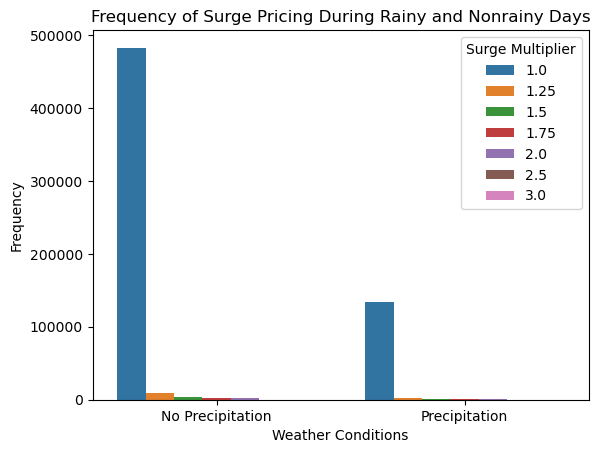

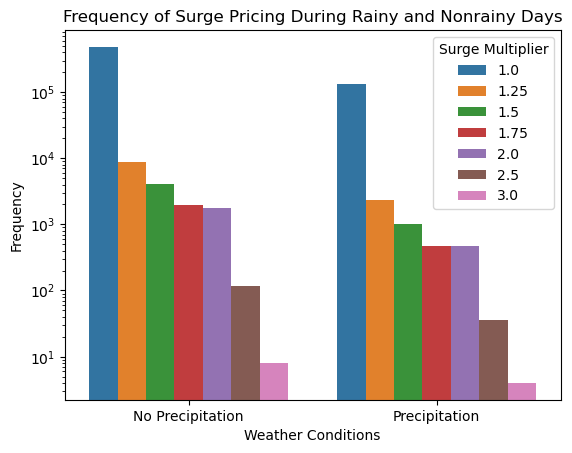

In [33]:
#Create a variable based on precipIntensity
data['precip_category'] = data['precipIntensity'].apply(lambda x: 'No Precipitation' if x == 0 else 'Precipitation')

# weather conditions based on precipitation
sns.countplot(data=data, x='precip_category', hue='surge_multiplier')


plt.title('Frequency of Surge Pricing During Rainy and Nonrainy Days')
plt.xlabel('Weather Conditions')
plt.ylabel('Frequency')
plt.legend(title='Surge Multiplier')

plt.show()

#Also adding the same graph but with a log scale on y axis to make the graph more readable
sns.countplot(data=data, x='precip_category', hue='surge_multiplier')

plt.title('Frequency of Surge Pricing During Rainy and Nonrainy Days')
plt.xlabel('Weather Conditions')
plt.ylabel('Frequency')
plt.legend(title='Surge Multiplier')
plt.yscale('log')

plt.show()

**This shows the frequency of surge pricing during rainy and non-rainy days. The distribution of surge pricing (1.25 vs 1.5 vs 2 etc...) seems to be extremely similar for both but are a larger percentage of rides in rainy weather subject to surge pricing? The graph makes it look like it might although it is hard to tell for sure so we will look into the summary statistics**

In [34]:
# Compute summary statistics
surge_weather_stats = data.groupby(['precip_category', 'surge_multiplier'])['price'].describe()

# Display summary statistics
print("Summary Statistics for Surge Pricing During Weather Conditions:")
print(surge_weather_stats)

Summary Statistics for Surge Pricing During Weather Conditions:
                                      count       mean        std   min  \
precip_category  surge_multiplier                                         
No Precipitation 1.00              482603.0  16.157945   8.872536   2.5   
                 1.25                8742.0  23.859815  10.816818   7.0   
                 1.50                4035.0  29.028253  13.240077   9.0   
                 1.75                1947.0  33.617360  15.728301  10.5   
                 2.00                1775.0  39.020282  18.065813  10.5   
                 2.50                 118.0  29.834746  11.618592  13.5   
                 3.00                   8.0  40.062500  13.597367  26.0   
Precipitation    1.00              134398.0  16.173160   8.888719   2.5   
                 1.25                2343.0  23.427657  10.638959   7.0   
                 1.50                1030.0  28.370388  13.121487   9.0   
                 1.75               

**It is hard to tell if this data supports that rainy weather causes surge pricing. It is notable that the mean price of precipitation versus non-precipitation is consistently higher for surge multipliers 1.75 through 3, although perhaps not significantly. Overall the mean price is only slightly higher during precipitation. So this does suggest that there may be some increase in demand during rain, leading to surge pricing, although perhaps not conclusively or definitively. Finally for even more clear and interpretable data we will just look at the count statistic for each surge multiplier divided by the total number of counts for precipitation and no precipitation to examine frequencies.**

In [35]:
surge_weather_count = data.groupby(['precip_category', 'surge_multiplier'])['price'].describe()# Filter data for precipitation and no precipitation separately

precipitation_data = data[data['precip_category'] == 'Precipitation']
noprecipitation_data = data[data['precip_category'] == 'No Precipitation']

# Calculate surge count statistics for precipitation
surge_weather_count_precip = precipitation_data.groupby(['precip_category', 'surge_multiplier'])['price'].describe()
total_precip_count = data[data['precip_category'] == 'Precipitation']['price'].count()

# Calculate surge count statistics for no precipitation
surge_weather_count_noprecip = noprecipitation_data.groupby(['precip_category', 'surge_multiplier'])['price'].describe()
total_noprecip_count = data[data['precip_category'] == 'No Precipitation']['price'].count()

# Extract and display only the "count" statistic
surge_count_precip = surge_weather_count_precip['count'] / total_precip_count
surge_count_noprecip = surge_weather_count_noprecip['count'] / total_noprecip_count
print("TITLE PLACEHOLDER")
print(surge_count_precip)
print(surge_count_noprecip)

TITLE PLACEHOLDER
precip_category  surge_multiplier
Precipitation    1.00                0.968648
                 1.25                0.016887
                 1.50                0.007424
                 1.75                0.003409
                 2.00                0.003344
                 2.50                0.000259
                 3.00                0.000029
Name: count, dtype: float64
precip_category   surge_multiplier
No Precipitation  1.00                0.966699
                  1.25                0.017511
                  1.50                0.008082
                  1.75                0.003900
                  2.00                0.003555
                  2.50                0.000236
                  3.00                0.000016
Name: count, dtype: float64


**Although It can be noted that the two most extreme multipliers (2.5 and 3) occur more frequently during precipitation, in general there surge multipliers are not more common in precipitation than in non-precipitation. Since we didn't observe any significant and clear trend between precipitation and surge pricing we will now turn our attention to whether cold weather causes surge pricing to vary.  We will take both the approach of selecting a single value to divide the data by temperature and the approach of examining the more extreme sides of the data: below 20 degrees and above 55 degrees.**

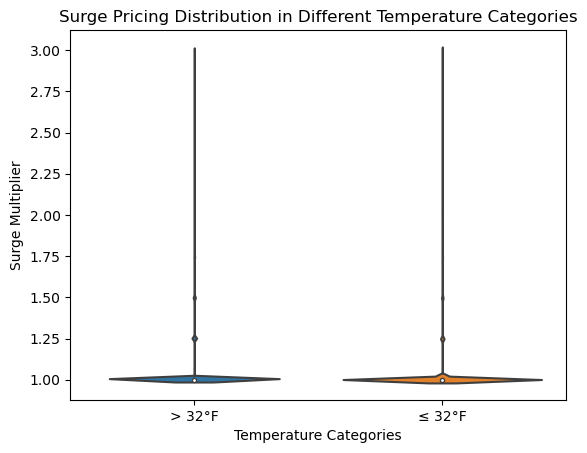

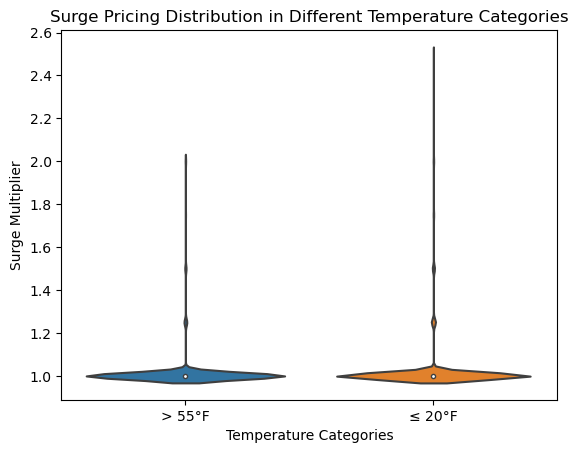

In [36]:

data['temperature_category'] = data['temperature'].apply(lambda x: '≤ 32°F' if x <= 32 else '> 32°F')
data['temperature_category_extreme'] = data['temperature'].apply(lambda x: '≤ 20°F' if x <= 20 else ('> 55°F' if x > 55 else 'Other'))

sns.violinplot(data=data, x='temperature_category', y='surge_multiplier')
plt.title('Surge Pricing Distribution in Different Temperature Categories')
plt.xlabel('Temperature Categories')
plt.ylabel('Surge Multiplier')

plt.show()

tail_data = data[data['temperature_category_extreme'].isin(['≤ 20°F', '> 55°F'])]
sns.violinplot(data=tail_data, x='temperature_category_extreme', y='surge_multiplier')
plt.title('Surge Pricing Distribution in Different Temperature Categories')
plt.xlabel('Temperature Categories')
plt.ylabel('Surge Multiplier')

plt.show()


In [37]:
# compute summary statistics
low_temp_stats = data[data['temperature_category'] == '≤ 32°F']['surge_multiplier'].describe()
high_temp_stats = data[data['temperature_category'] == '> 32°F']['surge_multiplier'].describe()

print("Summary Statistics for Surge Pricing with Temperature ≤ 32°F:")
print(low_temp_stats)
print("\nSummary Statistics for Surge Pricing with Temperature > 32°F:")
print(high_temp_stats)

print("\n")

# compute summary statistics
very_low_temp_stats = data[data['temperature_category_extreme'] == '≤ 20°F']['surge_multiplier'].describe()
very_high_temp_stats = data[data['temperature_category_extreme'] == '> 55°F']['surge_multiplier'].describe()


print("Summary Statistics for Surge Pricing with Temperature ≤ 20°F:")
print(very_low_temp_stats)
print("\nSummary Statistics for Surge Pricing with Temperature > 55°F:")
print(very_high_temp_stats)

Summary Statistics for Surge Pricing with Temperature ≤ 32°F:
count    93103.000000
mean         1.014997
std          0.094390
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: surge_multiplier, dtype: float64

Summary Statistics for Surge Pricing with Temperature > 32°F:
count    544873.000000
mean          1.015080
std           0.095597
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: surge_multiplier, dtype: float64


Summary Statistics for Surge Pricing with Temperature ≤ 20°F:
count    5041.000000
mean        1.015473
std         0.090926
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.500000
Name: surge_multiplier, dtype: float64

Summary Statistics for Surge Pricing with Temperature > 55°F:
count    1735.000000
mean        1.009798
std         0.072873
min         1.000000
25%         1.00000

**In both categories,(≤ 32°F vs. > 32°F), surge multipliers are primarily concentrated around 1.00, indicating that surge pricing is not very common in either temperature category. The mean surge multiplier for both temperature categories is very close to 1.00, suggesting that average surge pricing does not actually significantly deviate from the standard pricing during either cold or not-so-cold weather.  Even when taken to the extreme, the same statements above hold. ≤ 20°F has an average multiplier of 1.0155 and > 55°F has an average multiplier of 1.0098.  So there is a slight difference, but not significant enough to consider it conclusive evidence that low temperatures cause surge pricing to take effect.**

**WARNING: What other factors might contribute to surge pricing? Below we look at the time of the day and the day of the year, to visualize the distribution of surge multipliers at different times of the day/year.**

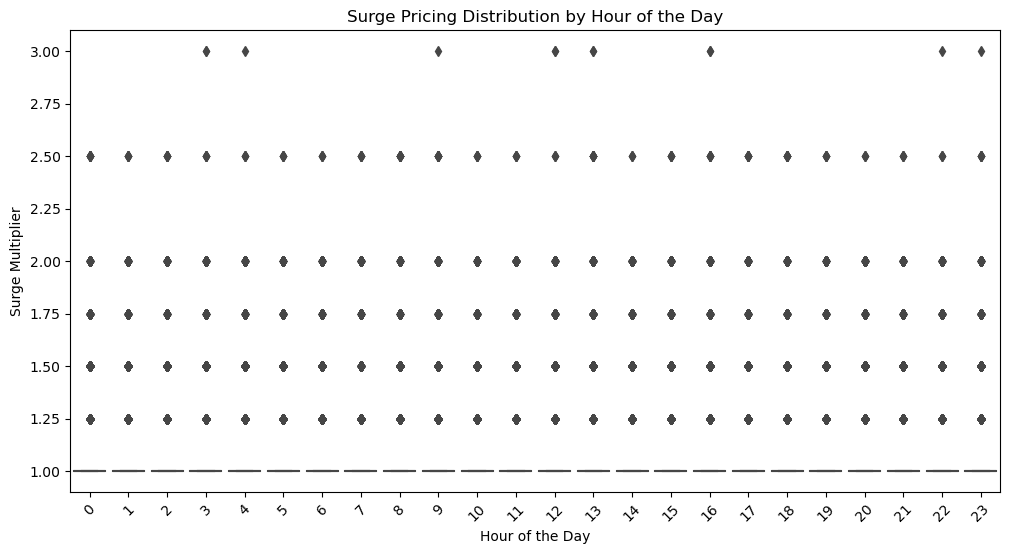

In [38]:
data['hour'] = data['timestamp'].dt.hour

# boxplot to visualize surge pricing by hour
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='hour', y='surge_multiplier')
plt.title('Surge Pricing Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Surge Multiplier')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Compute summary statistics for surge pricing by hour of the day
hourly_surge_stats = data.groupby('hour')['surge_multiplier'].describe()

print("Summary Statistics for Surge Pricing by Hour of the Day:")
print(hourly_surge_stats)

Summary Statistics for Surge Pricing by Hour of the Day:
        count      mean       std  min  25%  50%  75%  max
hour                                                      
0     29872.0  1.015449  0.095861  1.0  1.0  1.0  1.0  2.5
1     26310.0  1.015317  0.097080  1.0  1.0  1.0  1.0  2.5
2     26323.0  1.015652  0.097758  1.0  1.0  1.0  1.0  2.5
3     25530.0  1.014835  0.093712  1.0  1.0  1.0  1.0  3.0
4     26125.0  1.014526  0.093163  1.0  1.0  1.0  1.0  3.0
5     22995.0  1.014873  0.093388  1.0  1.0  1.0  1.0  2.5
6     25147.0  1.014515  0.091511  1.0  1.0  1.0  1.0  2.5
7     22930.0  1.013945  0.093536  1.0  1.0  1.0  1.0  2.5
8     22337.0  1.014908  0.093982  1.0  1.0  1.0  1.0  2.5
9     26673.0  1.015596  0.100148  1.0  1.0  1.0  1.0  3.0
10    27918.0  1.013862  0.088446  1.0  1.0  1.0  1.0  2.5
11    27946.0  1.015727  0.100337  1.0  1.0  1.0  1.0  2.5
12    28017.0  1.014893  0.093843  1.0  1.0  1.0  1.0  3.0
13    27977.0  1.018479  0.107649  1.0  1.0  1.0  1.0  3.0

**WARNING It appears that surge pricing tends to be very minimally higher during the late-night and early-morning hours (e.g, around 2 AM) and during the evening rush hours (e.g, 5 PM to 7 PM); however, this does indicate that users may be willing to pay higher fares during late-night hours. We next look at whether surge pricing varies on specific days of the year.**

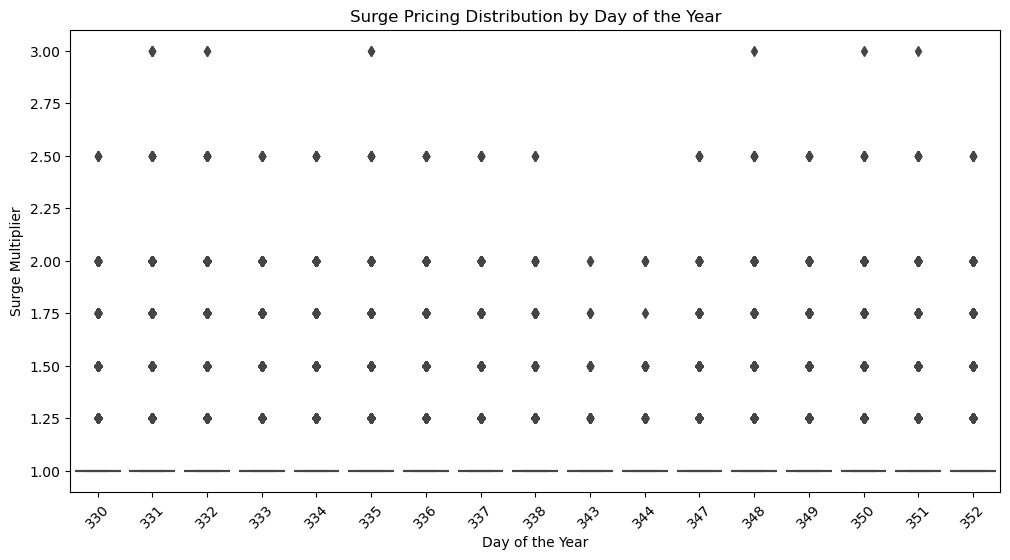

In [40]:
data['day_of_year'] = data['timestamp'].dt.dayofyear

# boxplot to visualize surge pricing by day of the year
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='day_of_year', y='surge_multiplier')
plt.title('Surge Pricing Distribution by Day of the Year')
plt.xlabel('Day of the Year')
plt.ylabel('Surge Multiplier')
plt.xticks(rotation=45)
plt.show()

**WARNING I MISS YOU A LOT : While there are some fluctuations, there doesn't appear to be a consistent pattern of surge pricing on these days of the year. We take a closer look into this by looking at Thanksgiving and Christmas to see if there are any noticeable patterns in surge pricing on these specific holidays.**

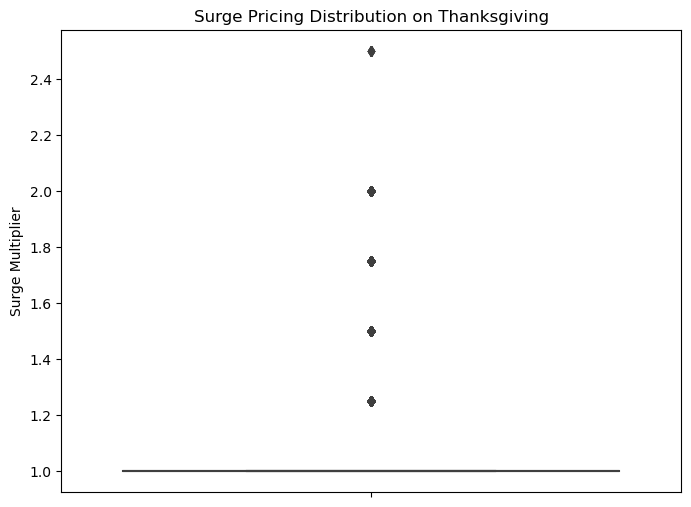

In [45]:
thanksgiving_data = data[data['timestamp'].dt.month == 11]  # November
thanksgiving_data = thanksgiving_data[thanksgiving_data['timestamp'].dt.weekday == 3]  # Thursday

# boxplot to visualize surge pricing on Thanksgiving
plt.figure(figsize=(8, 6))
sns.boxplot(data=thanksgiving_data, y='surge_multiplier')
plt.title('Surge Pricing Distribution on Thanksgiving')
plt.ylabel('Surge Multiplier')
plt.show()

**WARNING: The boxplot does not support the idea that holdiays might cause surge pricing to vary more(be much higher more specifically), as it appears that the surge pricing on Thanksgiving varies but does not show a clear trend of being siginificantly higher or lower than regular days. Other factors, such as the time of the day and demand fluctuations likely play a more prominent role in determining surge pricing.**

### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

**Answer here:** 

Ultimately we found our hypothesis to be largely untrue.  At least within the scope of November and December weather, it did not appear that rain or temperature had much impact on prices.  We saw slightly higher prices when it came to more extreme temperatures below 20 degrees but the difference was not large enough to be conclusive.  We think that our hypotheis being untrue is definitely still something interesting and useful.  Consumers now know that weather is unlikely to be the cause of them facing higher prices, except in extreme cases.  Uber and Lyft could also consider taking advantage of consumers' increased demand for rides in poor weather by applying light surge pricing if demand increases by a certain amount.  






### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

**Answer here:** (feel free to make multiple cells!)

**Warning**

One of the main shortcomings of our analysis is related to the quality and granularity of the data. We were working with weather and ride pricing data for specific months (November and December), which might not capture long-term trends or account for seasonal variations. Additionally, the data lacked detailed information about the surge pricing algorithms used by ride-sharing companies, making it challenging to draw direct correlations between weather and pricing.

Our analysis was limited to a specific timeframe and geographical location. By having different regions and time periods, we may have been able to gather varying behaviors in response to weather conditons and pricing strategies.

From an ethical persepective, it's important to consider the potential impact of our analysis on various stakeholders. The key stakeholders include ride-sharing companies(Uber and Lyft), drivers, and consumers. If our analysis had found conclusive evidence of unfair pricing strategies, this could have ethical implications for both companies and consumers. If an analysis had revealed unethical pricing practices, it could have damaged the reputation of ride-shairng companies and led to other regulartory issues. Drivers also might be impacted if surge pricing practices were found to be unfair or inconsistent. Drivers' earnings are closely tied to pricing strategis, so any unethical practices could affect their income. Finally, consumers could be impacted by surge pricing, especially during high-demand periods. If pricing is not transparent or is perceived as unfair, it could erode consumer trust, leading to a much smaller demand for rides from consumers. 

**Proposed Resolution**

One propositon for ride-sharing companies is to enhance transparency by providing clearer explanations of their pricing algorithms and when surge pricing is applied. This would help consumers understand pricing variations much better. Furthermore, collaborating with ride-sharing compaies to obtain more granular data on pricing and demand during specific weather conditions could lead to a more comprehensive analysis; however, this could require data-sharing agreements that ensure privacy and data protection. 


Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

**Answer here:** (feel free to make multiple cells!)

**Warning - bubu wrote this :)**

**Informative features:**
- Date and Time: date and time were highly informative, allowing us to analyze hourly and daily patterns in ride demand and pricing
- Weather conditions: Although we did not gather much data to support our hypothesis with these features, weather-realted features such as temperature and precipitation, were relevant for understanding the potential impact of weather on ride-sharing demand.

**Missing features:**
- Geographical Data: This could include data on the specic regions or cities where rides were taken , which would allow for regioanal variations in pricing and demand to be considered.
- Surge Pricing Details: More access to detailed surge pricing information, including base fares, potential algorithms used, multiplier thresholds, would enable a more precise analysis.
- User Profiles: User demographics and trip purposes could provide insights into how different consumer segments acutally react to price changes within specific weather conditions.
- Public Transportation Data: By integrating more public transportation data, inclusing schedules, fares, we could get a more holistic analysis of transportation choices made by consumers, and even in response to weather.
- Driver Availability: Data on the availability of the drivers including the number of active drivers in specific areas could help explain variations in response times and pricing as well.
- Economic indicators: Information about unemployment rates, or disposable income levels in specific areas, could provide more context for consumer behavior and pricing sensitivity. 
- Generally limited data: Several features were useful but limited in scope.  For example, weather features were useful but the data only coming from November and December seriously limits the conditions that can be analyzed.  Furthermore timezone is provided as a feature, which could be useful if the data was actually spread across timezones (but it is not).


And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

### Submission instructions
* Check to make sure that your code runs without error on a fresh kernel. Within jupyter, **Kernel -> Restart & Run All**. 
* **Save your notebook!**
* Submit this Python notebook, including your answers in the code cells as homework submission. **Be sure to add your partner to the submission as well**.
* After submitting, navigate to the **code tab** to view your submission. Verify that all your write-ups, markdown cells, and visualizations appear correctly on Gradescope. This is the **exact** view the graders will see when grading your work, so make sure that everything looks as expected.